In [1]:
import pandas as pd
import numpy as np
import os
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
scores = pd.read_csv('scores.csv')

In [3]:
scores

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,10-Jun,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,10-Jun,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,10-Jun,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,15-Nov,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,15-Nov,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,10-Jun,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,2.0,2.0,15-Nov,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,2.0,2.0,15-Nov,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,2.0,2.0,10-Jun,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,10-Jun,1.0,2.0,28.0,21.0


In [8]:
scores1 = scores.drop(labels=range(23, 55), axis=0)

In [9]:
scores1

,number,gender,age,afftype,melanch,inpatient,marriage,work,madrs1
0,condition_1,2,35-39,2.0,2.0,2.0,1.0,2.0,19.0
1,condition_2,2,40-44,1.0,2.0,2.0,2.0,2.0,24.0
2,condition_3,1,45-49,2.0,2.0,2.0,2.0,2.0,24.0
3,condition_4,2,25-29,2.0,2.0,2.0,1.0,1.0,20.0
4,condition_5,2,50-54,2.0,2.0,2.0,2.0,2.0,26.0
5,condition_6,1,35-39,2.0,2.0,2.0,1.0,2.0,18.0
6,condition_7,1,20-24,1.0,2.0,2.0,2.0,1.0,24.0
7,condition_8,2,25-29,2.0,2.0,2.0,1.0,2.0,20.0
8,condition_9,2,45-49,1.0,2.0,2.0,1.0,2.0,26.0
9,condition_10,2,45-49,2.0,2.0,2.0,1.0,2.0,28.0


In [50]:
y = scores1['madrs1']
X = scores1.drop(columns = ['madrs1', 'number'])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=123)

In [52]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18, 7) (5, 7) (18,) (5,)


In [53]:
tree_clf = DecisionTreeClassifier()

In [54]:
tree_clf.fit(X_train, y_train)

ValueError: could not convert string to float: '45-49'

In [43]:
tree_clf.score(X_test, y_test)

0.0

TypeError: can only concatenate str (not "numpy.float64") to str

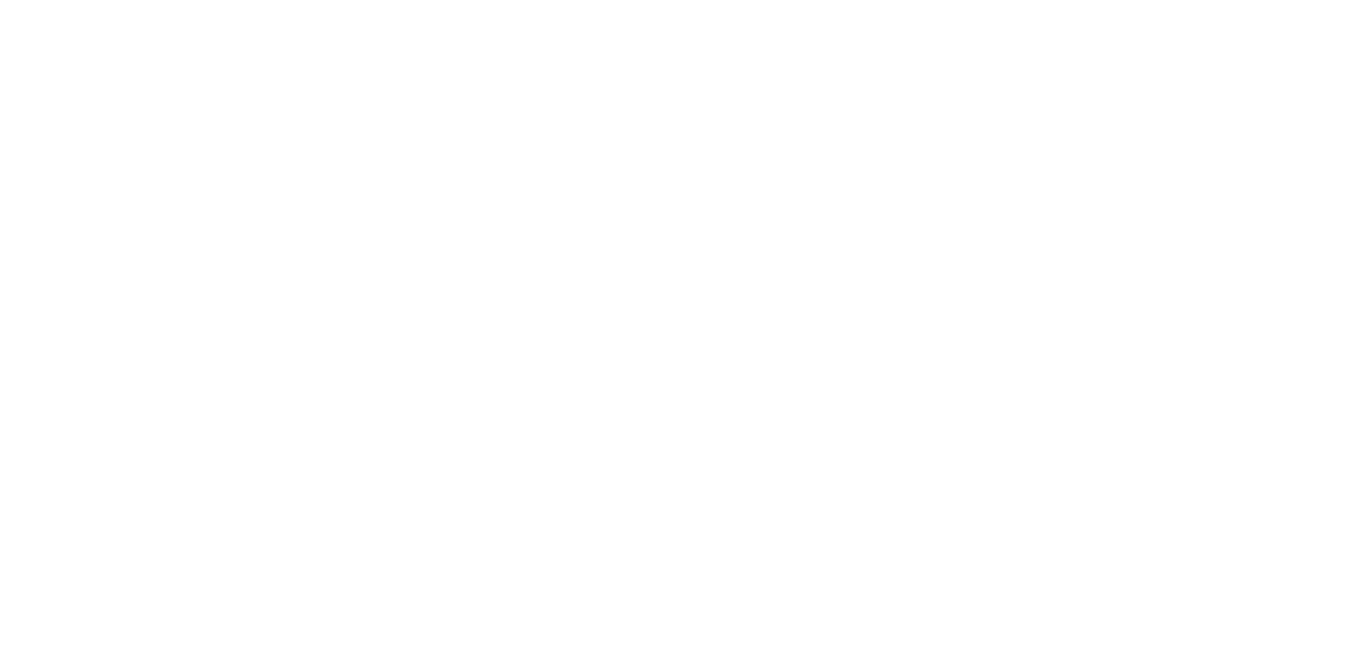

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = [24.0, 12.0])

_ = plot_tree(
          decision_tree = tree_clf,
          feature_names = X.columns,
          class_names =  tree_clf.classes_,
          impurity = False,
          filled = True,
          fontsize = 11)

plt.show()

In [37]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()